# Data Collection and Analysis

Following notebook contains hell lot of graphs and stuff , so better not to freak out !!!!!!

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()
#prints 1st 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


 when we get the data info we can see that there are some features where values are NaNs , so we have to replace these NaNs with median or mean of the whole data of the particular feature.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


so Age, Fare, Cabin are the three features with some NaNs 

In [8]:
train.isnull().sum()
#which tells about the null data of particular feature.
# so here 177 positions or values in Age is null similarlly for other two features.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Bar Charts for Feature Analysis

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

We will be using Seaborn for data plotting,we will define a function which produces bar graph of particular feature versus survived numbers, upon calling the funcion.

In [10]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    #value_counts() function automatically rejects all the NaNs
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

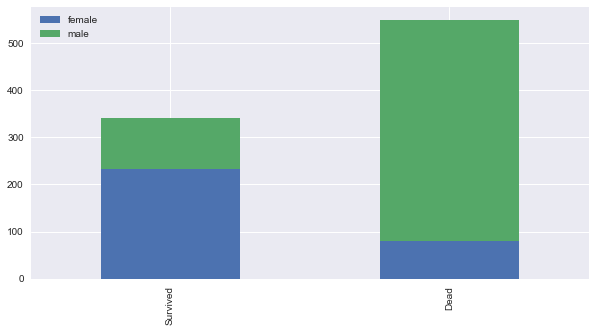

In [11]:
bar_chart('Sex')

## Feature Engineering

In [12]:
# Machine is not able to read the names , so we classify the feature into few classes and give them numbers as values,
# we combine test and train data for that, also remove the NaNs and replace them with proper values instead.
train_test_data = [train,test]

In [14]:
for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Lady          1
Countess      1
Sir           1
Jonkheer      1
Don           1
Mme           1
Capt          1
Name: Title, dtype: int64

similarly for test data, and now we will map those Mr,Ms,Mrs and others.


In [16]:
#title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
#                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
#                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
#for dataset in train_test_data:
#    dataset['Title'] = dataset['Title'].map(title_mapping)


In [17]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [18]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [19]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


bingo we just created a new feature for our convinience.

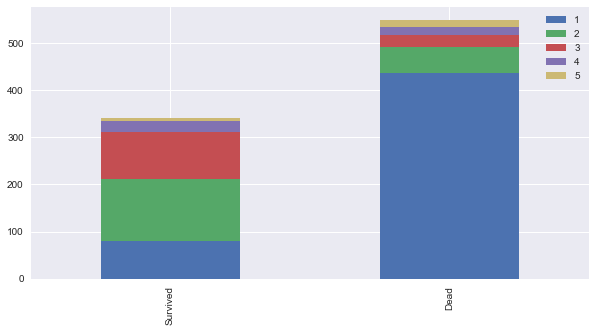

In [20]:
bar_chart('Title')

In [21]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

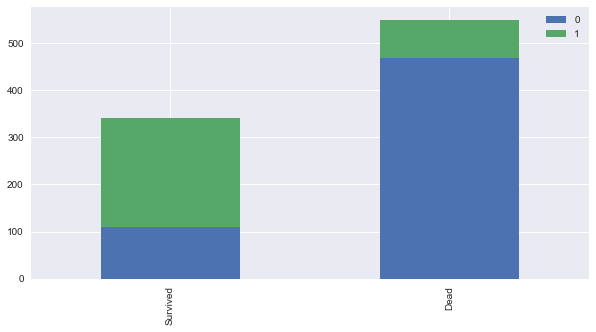

In [22]:
bar_chart('Sex')

In [23]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
#there is no need of features such as names

In [24]:
#fill median age of Mr,Ms,Mrs,others for the NaNs of this classes
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace =True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace =True)

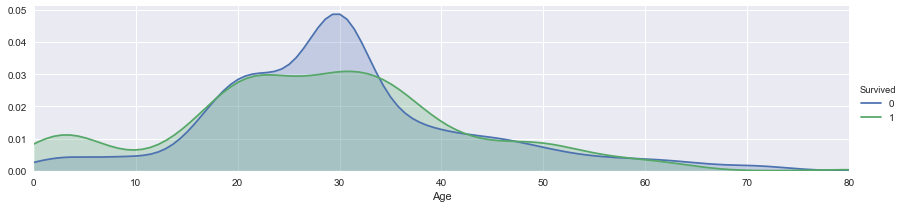

In [25]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

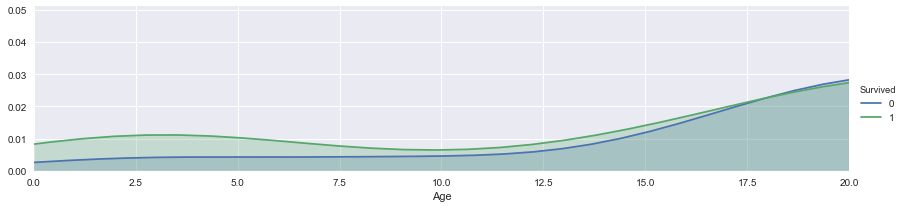

In [26]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

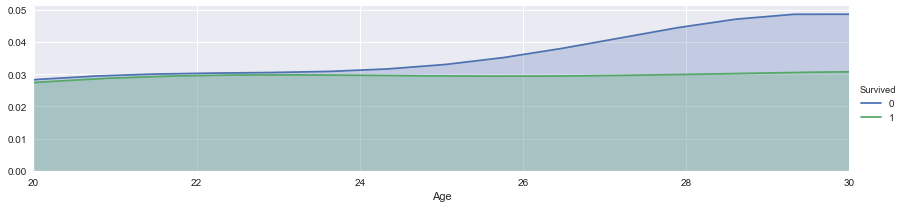

In [27]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

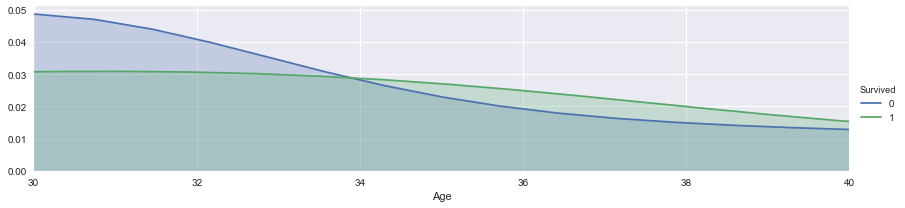

In [28]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

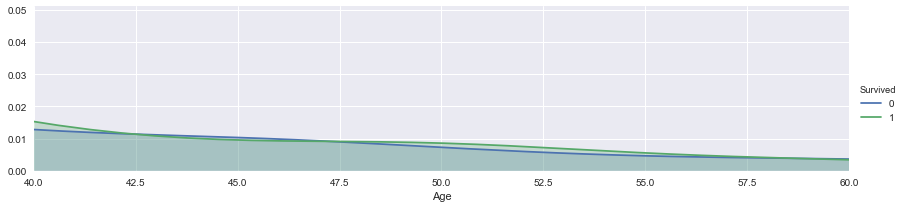

In [29]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

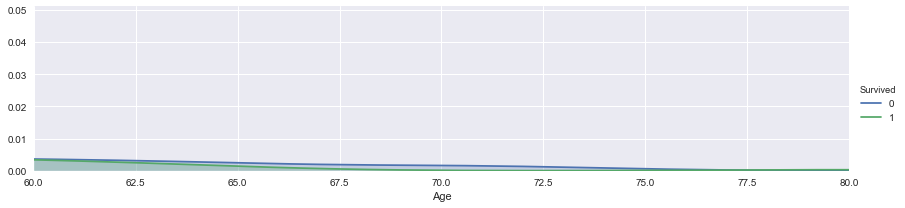

In [30]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

In [31]:
train.info()
#still cabin, embarked this features have some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


the age feature is now can be converted into several classes with labels as numbers. Such as, 
child: 0
young: 1 
adult: 2 
mid-age: 3
senior: 4 
this is called as binning(converting numerical values into categorical variable )

In [32]:
#we use the data analysis from above graphs to analyze the classification of Age feature
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1


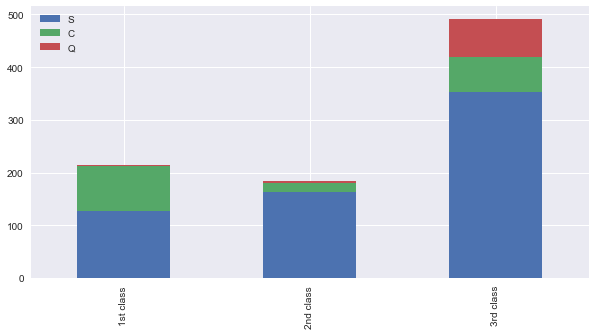

In [34]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [35]:
df

,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


In [36]:
#from the above data we see that S is the most common station for embarkment, so we will put it as a replacement for NaNs
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1


In [38]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [39]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace =True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace =True)

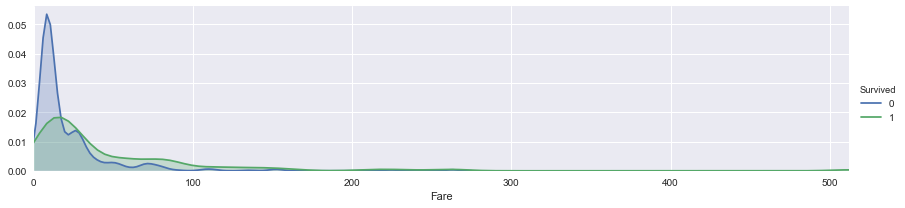

In [40]:

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()


(0, 20)

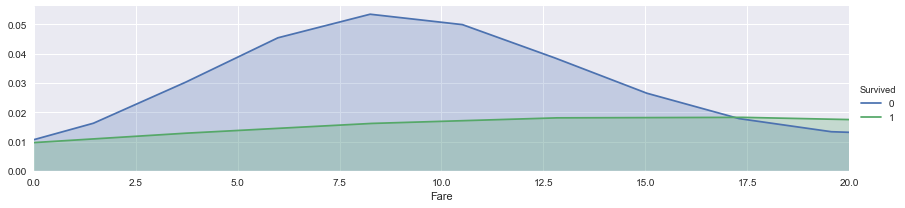

In [41]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

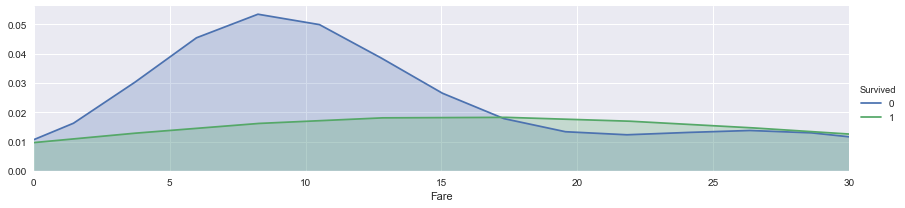

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [43]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [44]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [45]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
F33            3
D              3
C22 C26        3
C92            2
C68            2
D20            2
D36            2
C78            2
B5             2
F G73          2
B58 B60        2
C2             2
D26            2
B20            2
F4             2
E44            2
E67            2
C93            2
B28            2
D33            2
B49            2
C123           2
C126           2
E8             2
C83            2
              ..
C103           1
B38            1
B80            1
C87            1
D9             1
C90            1
D47            1
A23            1
E77            1
C46            1
D46            1
A26            1
B41            1
D49            1
C118           1
C148           1
D11            1
E63            1
E40            1
C104           1
D10 D12        1
E12            1
C99            1
C91            1
E36            1
C110           1
B79            1
B101          

In [46]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [47]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

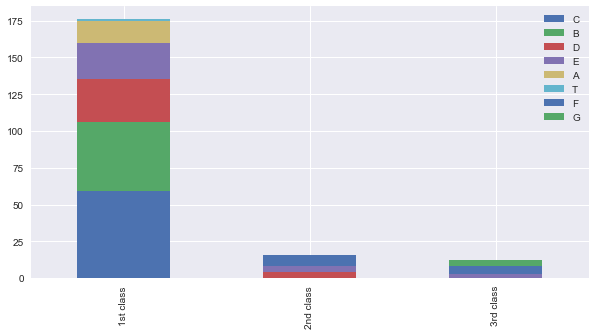

In [48]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [49]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
#the feature matching is done in such way that all 8 cabins are equally ranged in 3 classes i.e. 8/3 approx is the gap.


In [50]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [51]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

(0, 11.0)

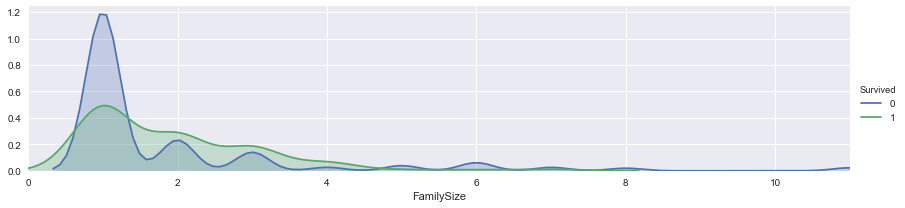

In [52]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [53]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())


   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [54]:
#family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
#for dataset in train_test_data:
#    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
#the similar feature matching is done here too.

In [55]:
#we decide the classification on the basis of graphical analysis of the particular feature.

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBand,FamilySize,IsAlone
0,1,0,3,0,1.0,1,0,A/5 21171,0,2.0,0,1,"(-0.001, 7.91]",2,0
1,2,1,1,1,3.0,1,0,PC 17599,3,0.8,1,3,"(31.0, 512.329]",2,0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1,2.0,0,2,"(7.91, 14.454]",1,1
3,4,1,1,1,2.0,1,0,113803,3,0.8,0,3,"(31.0, 512.329]",2,0
4,5,0,3,0,2.0,0,0,373450,1,2.0,0,1,"(7.91, 14.454]",1,1


In [57]:
features_drop = ['Ticket', 'SibSp', 'Parch','FamilySize','Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)


In [58]:

train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [59]:
train_data = train_data.drop('FareBand',axis=1)

In [60]:
train_data


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1.0,0,0,1,0
1,1,1,3.0,3,1,3,0
2,3,1,1.0,1,0,2,1
3,1,1,2.0,3,0,3,0
4,3,0,2.0,1,0,1,1
5,3,0,2.0,1,2,1,1
6,1,0,3.0,3,0,1,1
7,3,0,0.0,2,0,4,0
8,3,1,2.0,1,0,3,0
9,2,1,0.0,2,1,3,0


In [61]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,0,2,1,1
1,893,3,1,3.0,0,0,3,0
2,894,2,0,3.0,1,2,1,1
3,895,3,0,2.0,1,0,1,1
4,896,3,1,1.0,1,0,3,0


## Use of the Scikit Models

In [62]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
FareBand    891 non-null category
IsAlone     891 non-null int64
dtypes: category(1), float64(1), int64(7)
memory usage: 56.7 KB


In [64]:
import numpy as np

In [65]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data,target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction = random_forest.predict(test_data)
random_forest.score(train_data,target)

0.8709315375982043

In [66]:
train_data

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1.0,0,0,1,0
1,1,1,3.0,3,1,3,0
2,3,1,1.0,1,0,2,1
3,1,1,2.0,3,0,3,0
4,3,0,2.0,1,0,1,1
5,3,0,2.0,1,2,1,1
6,1,0,3.0,3,0,1,1
7,3,0,0.0,2,0,4,0
8,3,1,2.0,1,0,3,0
9,2,1,0.0,2,1,3,0


In [67]:
#clf=SVC()
#clf.fit(train_data,target)
#test_data = test.drop("PassengerId", axis=1).copy()
#prediction = clf.predict(test_data)
#print(clf.score(train_data,target))

In [68]:
prediction.shape

(418,)

In [69]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [70]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
